# TASK 1: Image reading and displaying

Image reading is a core functionality of any image processing algorithm and often available in the form of a function ‘imread()’. In this task you need to write your own ‘imread()’ function which can read .pgm images (pgm test dataset is given with this assignment). Once you read your image(s), you need display them with existing library call.

In [ ]:
%%capture
import matplotlib.pyplot as plt
import numpy as np
import os

import pywt
import pywt.data
from pywt._doc_utils import wavedec2_keys, draw_2d_wp_basis

from math import sqrt

In [ ]:
def show_image_greyscale(image_matrix):
    """
    show_image_greyscale
    shows image in greyscale

    Input: matrix of image pixels
    Output: shows image
    """
    plt.imshow(image_matrix, cmap='gray', vmin=0, vmax=1)
    plt.axis('off')
    plt.margins(x=0)
    plt.show()

def read_pgm(im):
    """
    read_pgm reads pgm file and return the matrix store image data
    input: pgm file
    output: image matrix
    """
    with open(im, 'rb') as f:
        metadata = f.readline().decode("utf-8").rstrip('\n').split(" ")
        if len(metadata) == 1: # Read for more metadata in other line
            # Format
            format = metadata[0]
            
            # Check comment
            next_line = f.readline().decode("utf-8").rstrip('\n')
            while next_line.startswith('#'):
                next_line = f.readline().decode("utf-8").rstrip('\n')
            
            # Check Dimension
            shape = next_line.split(" ")
            num_rows = int(shape[1])
            num_columns = int(shape[0])

            # Get maximum grey level specify in the image
            max_grey_level = int(f.readline().decode("utf-8").rstrip('\n'))
        else: 
            format, num_columns, num_rows, max_grey_level = metadata[0], int(metadata[1]), int(metadata[2]), int(metadata[3])
        
        # Read pixel data
        pixel_data = f.read()
        if format == 'P2':
            # Decode byte to string to get the raster
            decoded_string = pixel_data.decode("utf-8")
            pgm_info = [int(data.strip("\n")) for data in decoded_string.split(" ") if data.strip("\n")]

            # Convert the list to a NumPy array and reshape
            pic = np.array(pgm_info, dtype=int).reshape(num_rows, num_columns) 
        
        elif format == 'P5':
            # Convert binary data to ASCII
            pixels = [byte for byte in pixel_data]
            pic = np.array(pixels, dtype=int).reshape(num_rows, num_columns)
        
        else:
            raise("Unknown format")

    # Normalize to the range [0, 1]
    normalized_image = pic / max_grey_level

    return normalized_image 

### Test read image

#### Read p5

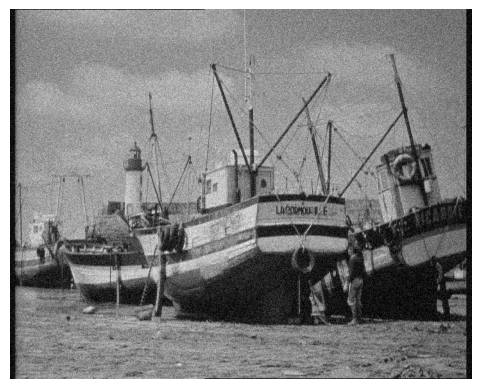

In [ ]:
pgm_p5_oneline = "./Noisy/noisy_1/boats.pgm"
show_image_greyscale(read_pgm(pgm_p5_oneline))

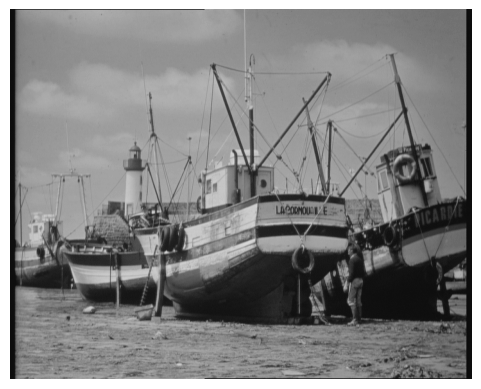

In [ ]:
pgm_p5 = "./Dataset/boats.pgm"
show_image_greyscale(read_pgm(pgm_p5))

#### Read P2

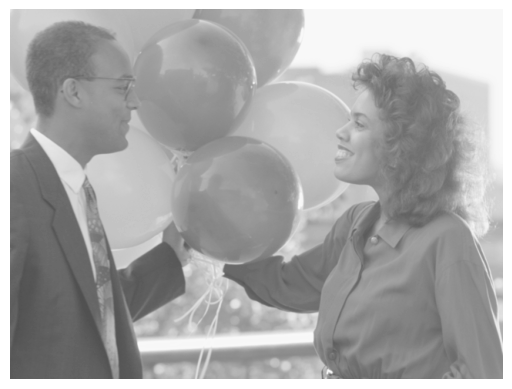

In [ ]:
pgm_p2 = "example.ascii.pgm"
show_image_greyscale(read_pgm(pgm_p2))